<a href="https://www.kaggle.com/code/zainhana/customer-segmentation-with-kkn-method-final-resul?scriptVersionId=95090408" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation/train.csv
/kaggle/input/customer-segmentation/test.csv


In [36]:
train = pd.read_csv("../input/customer-segmentation/train.csv")
test = pd.read_csv("../input/customer-segmentation/test.csv")

In [37]:
print("shape of train data {}\n".format(train.shape))

print("shape of test data {}\n".format(test.shape))

shape of train data (8068, 11)

shape of test data (2627, 10)



In [38]:
df_train = [x for x in train if x not in test]
print("Column in train data but not in test data {}\n".format(df_train))

df_test = [x for x in test if x not in train]
print("Column in test data but not in train data {}\n".format(df_test))

Column in train data but not in test data ['Segmentation']

Column in test data but not in train data []



In [39]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [40]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [42]:
missing_train = train.isna().sum()
percentage_missing_train = train.isna().mean().round(4)*100
data = {'Missing Values' : missing_train,
        'percentage missing values' : percentage_missing_train
       }
# data2 = data.sort_values(by='Missing Values')
data2 = pd.DataFrame(data)
data3 = data2.sort_values(by='Missing Values',ascending=False)
data3

,Missing Values,percentage missing values
Work_Experience,829,10.28
Family_Size,335,4.15
Ever_Married,140,1.74
Profession,124,1.54
Graduated,78,0.97
Var_1,76,0.94
ID,0,0.00
Gender,0,0.00
Age,0,0.00
Spending_Score,0,0.00


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


<AxesSubplot:>

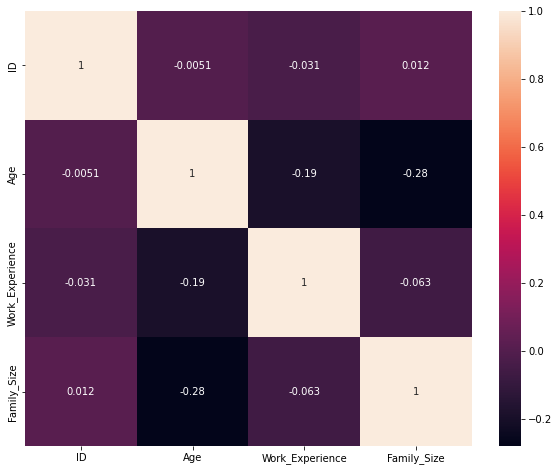

In [44]:
corrmat = train.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, yticklabels=True, square= False, annot=True)

#change segmentation to numeric

In [45]:
train['Segmentation'].value_counts().sort_values(ascending=False)

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [46]:
# train['Segmentation'] = train['Segmentation'].map({'A':1,'B':2,'C':3,'D':4})

<AxesSubplot:title={'center':'Segmentation Count'}, xlabel='Segmentation', ylabel='count'>

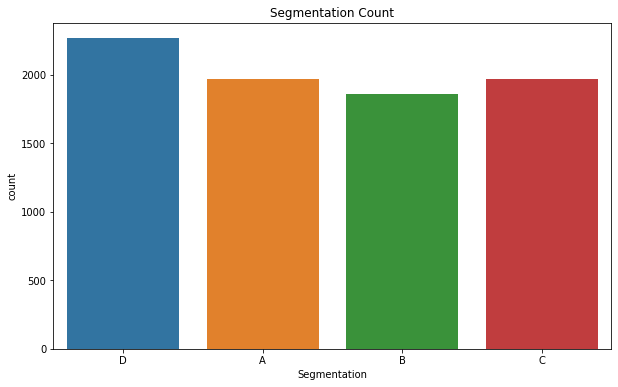

In [47]:
plt.figure(figsize=(10,6))
plt.title('Segmentation Count')
sns.countplot(x=train.Segmentation)
# sns.countplot(train['Segmentation'].value_counts().sort_values(ascending=False))

In [48]:
import plotly.express as px
fig = px.pie(train, names = "Segmentation",
             title = "<b>Counts in Segmentation</b>",
             hole = 0.5,             
            color_discrete_sequence=px.colors.sequential.Sunset_r)

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

In [49]:
#save ID from test
test_id = test['ID'].tolist()

#drop ID from test & train
test.drop(['ID'],axis = 1, inplace = True)
train.drop(['ID'],axis = 1, inplace = True)

#save segmen from train
target = train['Segmentation'].values


print(target)

['D' 'A' 'B' ... 'D' 'B' 'B']


In [50]:
train.Segmentation.value_counts().sort_values(ascending=False)

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [51]:
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


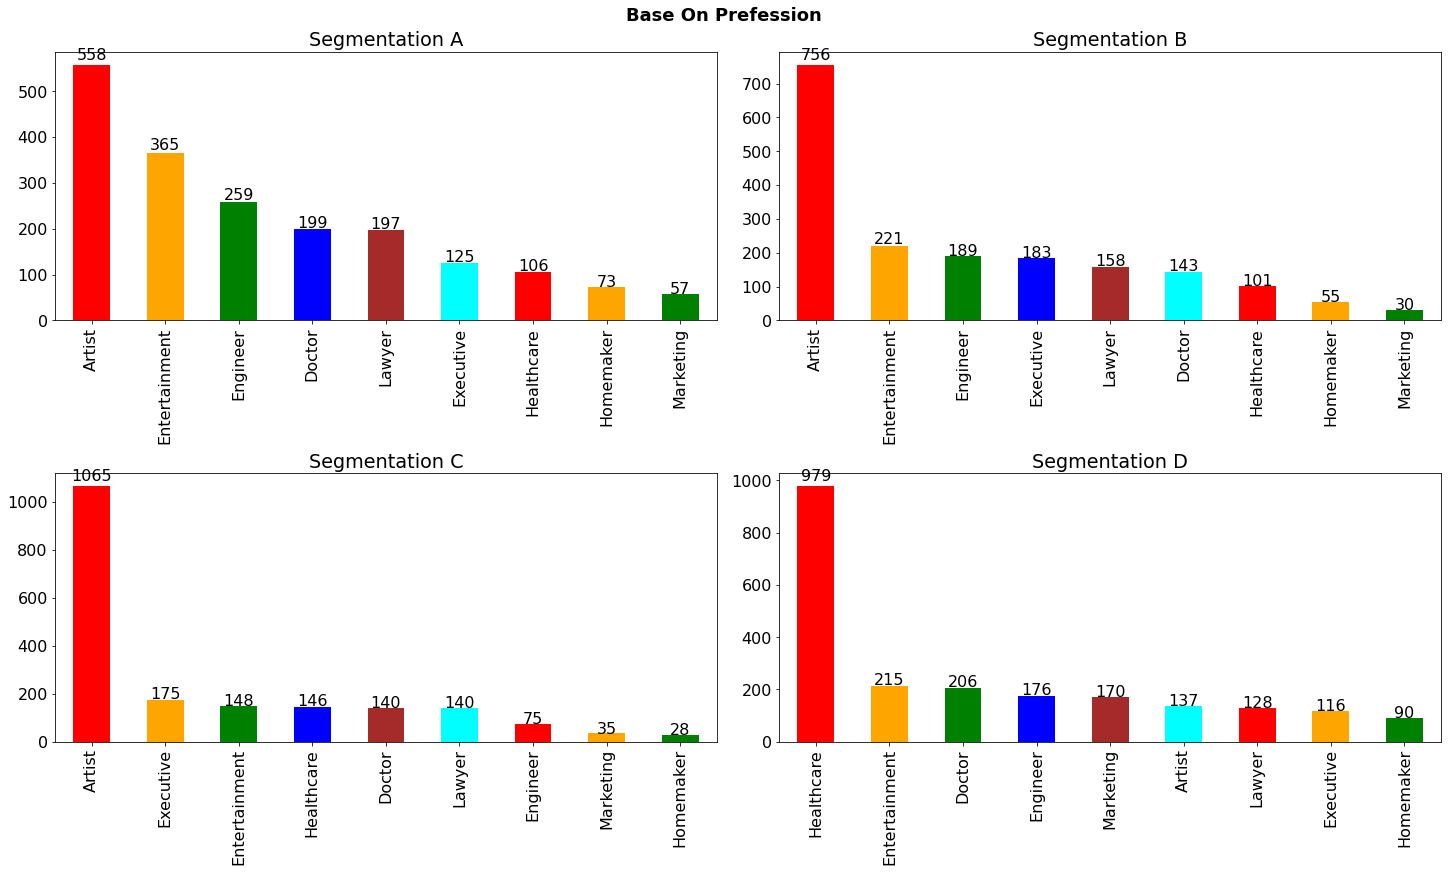

In [52]:
## Segmentation for Profession

plt.figure(figsize=(20,12),constrained_layout = True)

color_list = ["red","orange","green","blue","brown","cyan"]
plt.suptitle("Base On Prefession", fontweight="bold", fontsize ='18')
plt.rcParams['font.size'] = '16'

plt.subplot(2,2,1)
ax = train.Profession[train['Segmentation']=='A'].value_counts().plot(kind='bar',color=color_list)
ax.set_title("Segmentation A")

plt.subplot(2,2,2)
ay = train.Profession[train['Segmentation']=='B'].value_counts().plot(kind='bar',color=color_list)
ay.set_title("Segmentation B")

plt.subplot(2,2,3)
az = train.Profession[train['Segmentation']=='C'].value_counts().plot(kind='bar',color=color_list)
az.set_title("Segmentation C")

plt.subplot(2,2,4)
ap = train.Profession[train['Segmentation']=='D'].value_counts().plot(kind='bar',color=color_list)
ap.set_title("Segmentation D")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
for p in ay.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ay.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
for p in az.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    az.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
for p in ap.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ap.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
plt.savefig('segmenprofression.png')
   


# train[train.Family_Size.isnull()]

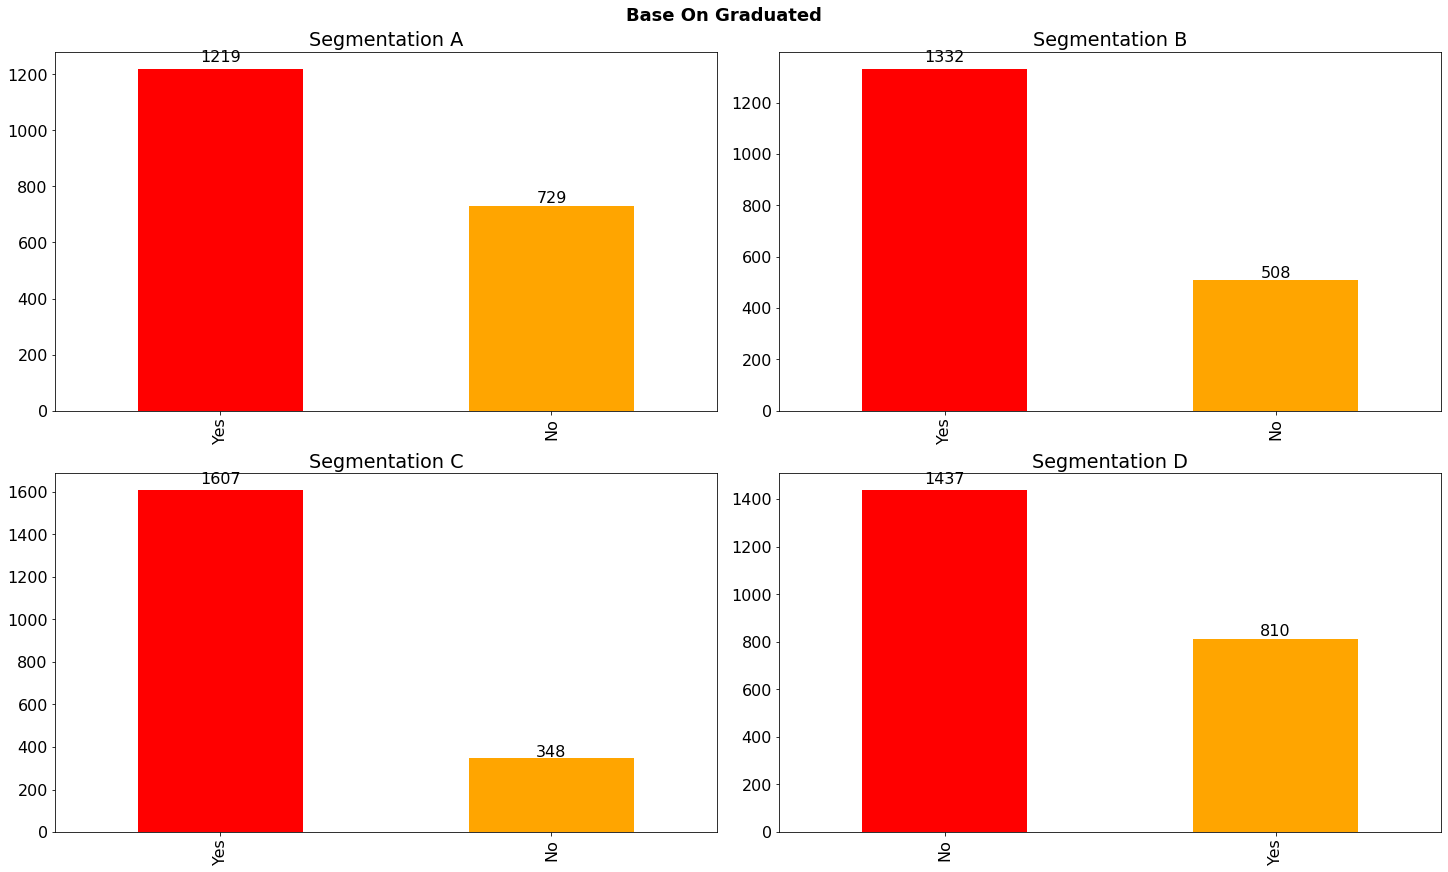

In [53]:
## Segmentation for Graduated

plt.figure(figsize=(20,12),constrained_layout = True)
plt.suptitle("Base On Graduated", fontweight="bold", fontsize ='18')
plt.rcParams['font.size'] = '16'
color_list = ["red","orange","green","blue","brown","cyan"]

plt.subplot(2,2,1)
ax = train.Graduated[train['Segmentation']=='A'].value_counts().plot(kind='bar',color=color_list)
ax.set_title("Segmentation A")

plt.subplot(2,2,2)
ay = train.Graduated[train['Segmentation']=='B'].value_counts().plot(kind='bar',color=color_list)
ay.set_title("Segmentation B")

plt.subplot(2,2,3)
az = train.Graduated[train['Segmentation']=='C'].value_counts().plot(kind='bar',color=color_list)
az.set_title("Segmentation C")

plt.subplot(2,2,4)
ap = train.Graduated[train['Segmentation']=='D'].value_counts().plot(kind='bar',color=color_list)
ap.set_title("Segmentation D")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
for p in ay.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ay.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
for p in az.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    az.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
for p in ap.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ap.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
plt.savefig('segmengraduated.png')

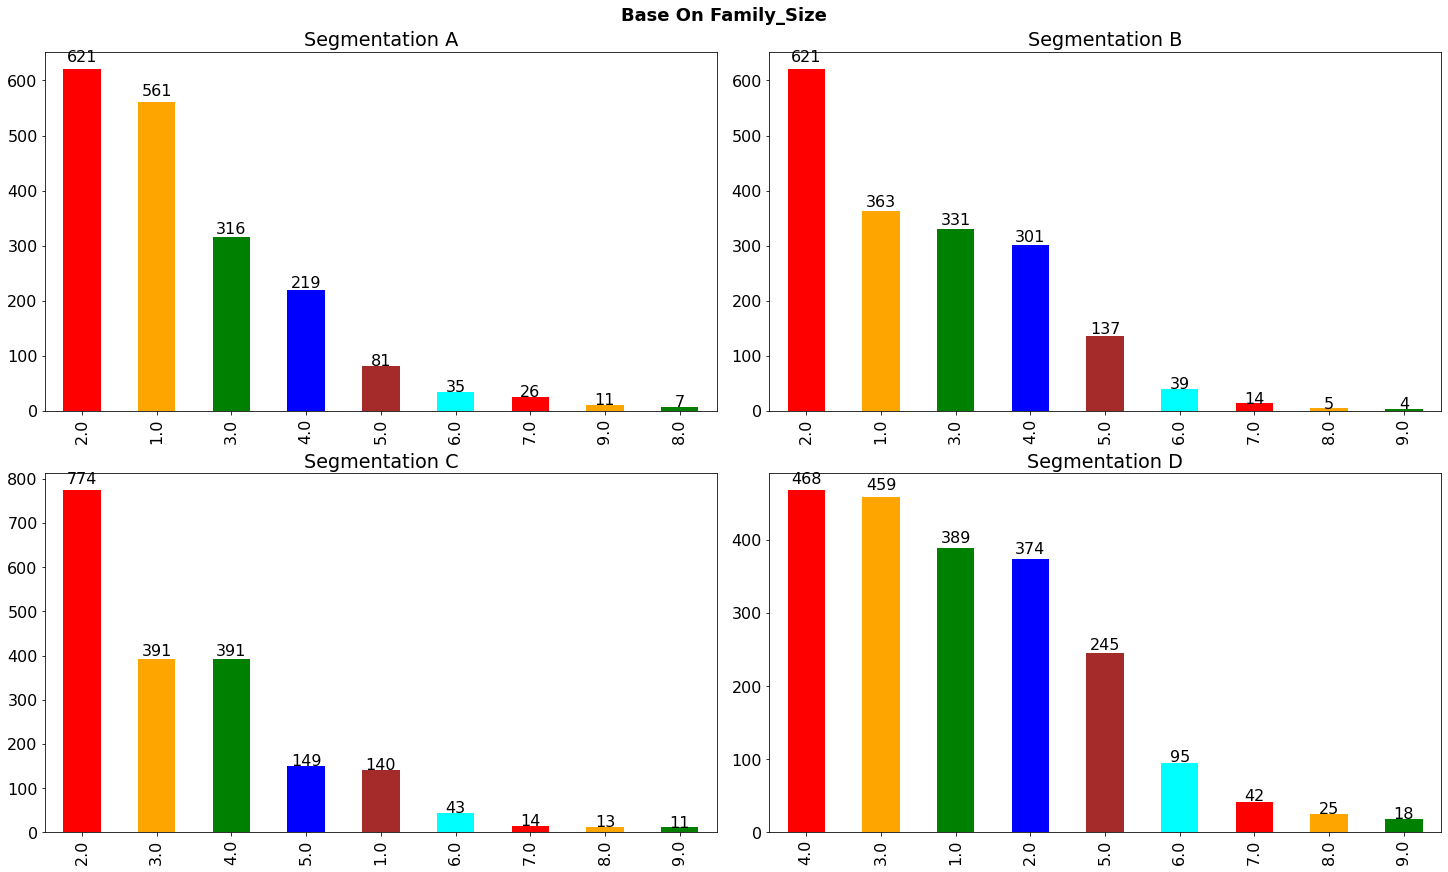

In [54]:
## Segmentation for Family_Size

plt.figure(figsize=(20,12),constrained_layout = True)
plt.suptitle("Base On Family_Size", fontweight="bold", fontsize ='18')
plt.rcParams['font.size'] = '16'
color_list = ["red","orange","green","blue","brown","cyan"]

plt.subplot(2,2,1)
ax = train.Family_Size[train['Segmentation']=='A'].value_counts().plot(kind='bar',color=color_list)
ax.set_title("Segmentation A")

plt.subplot(2,2,2)
ay = train.Family_Size[train['Segmentation']=='B'].value_counts().plot(kind='bar',color=color_list)
ay.set_title("Segmentation B")

plt.subplot(2,2,3)
az = train.Family_Size[train['Segmentation']=='C'].value_counts().plot(kind='bar',color=color_list)
az.set_title("Segmentation C")

plt.subplot(2,2,4)
ap = train.Family_Size[train['Segmentation']=='D'].value_counts().plot(kind='bar',color=color_list)
ap.set_title("Segmentation D")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
for p in ay.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ay.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
for p in az.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    az.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
for p in ap.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ap.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
plt.savefig('segmenfamily.png')

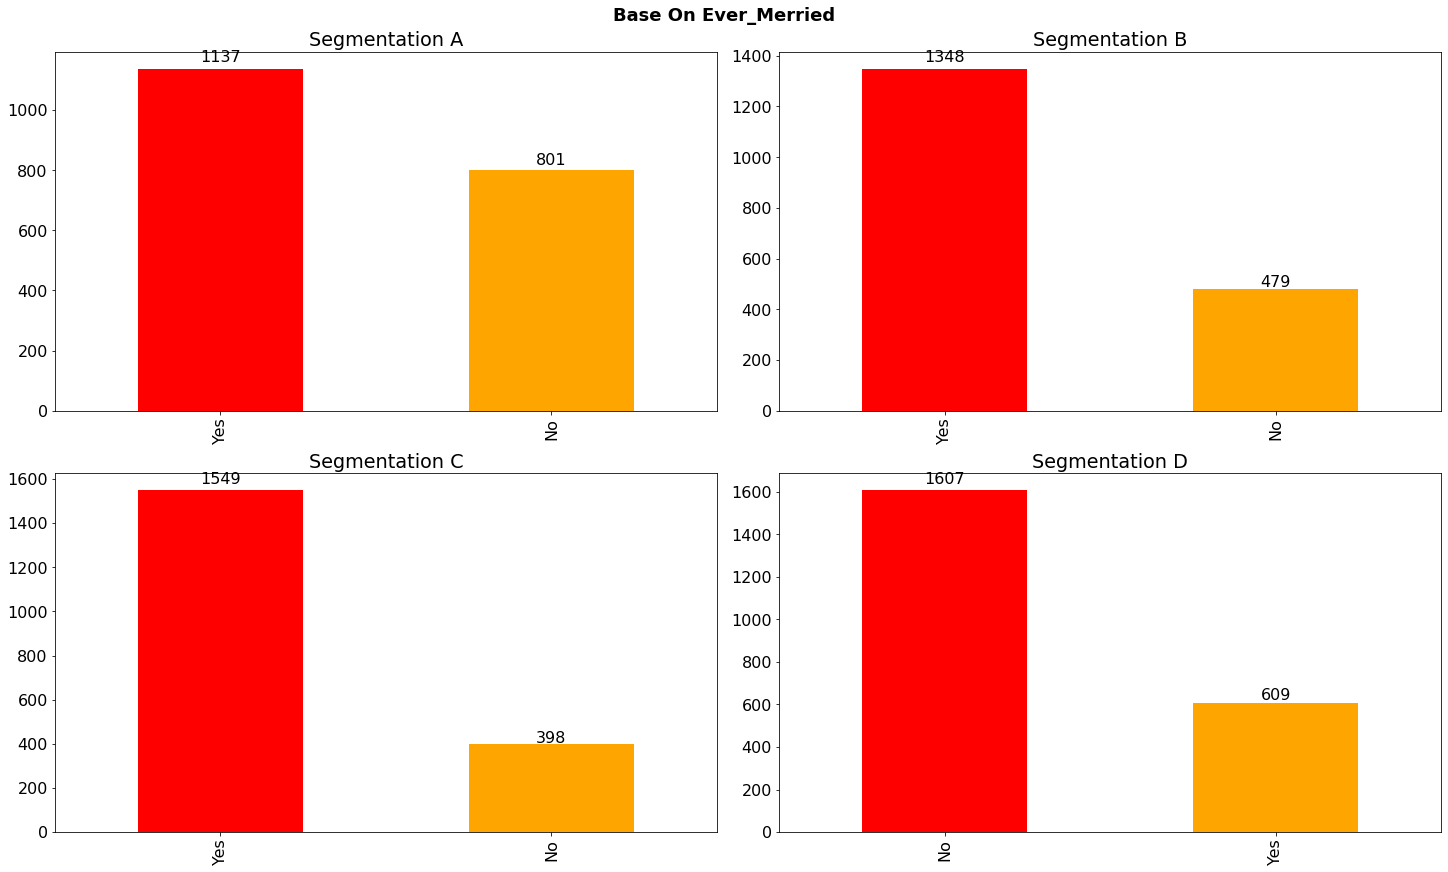

In [55]:
## Segmentation for Ever_Married

plt.figure(figsize=(20,12),constrained_layout = True)
plt.suptitle("Base On Ever_Merried", fontweight="bold", fontsize ='18')
plt.rcParams['font.size'] = '16'
color_list = ["red","orange","green","blue","brown","cyan"]

plt.subplot(2,2,1)
ax = train.Ever_Married[train['Segmentation']=='A'].value_counts().plot(kind='bar',color=color_list)
ax.set_title("Segmentation A")

plt.subplot(2,2,2)
ay = train.Ever_Married[train['Segmentation']=='B'].value_counts().plot(kind='bar',color=color_list)
ay.set_title("Segmentation B")

plt.subplot(2,2,3)
az = train.Ever_Married[train['Segmentation']=='C'].value_counts().plot(kind='bar',color=color_list)
az.set_title("Segmentation C")

plt.subplot(2,2,4)
ap = train.Ever_Married[train['Segmentation']=='D'].value_counts().plot(kind='bar',color=color_list)
ap.set_title("Segmentation D")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
for p in ay.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ay.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
for p in az.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    az.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
for p in ap.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ap.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
plt.savefig('segmenmarried.png')

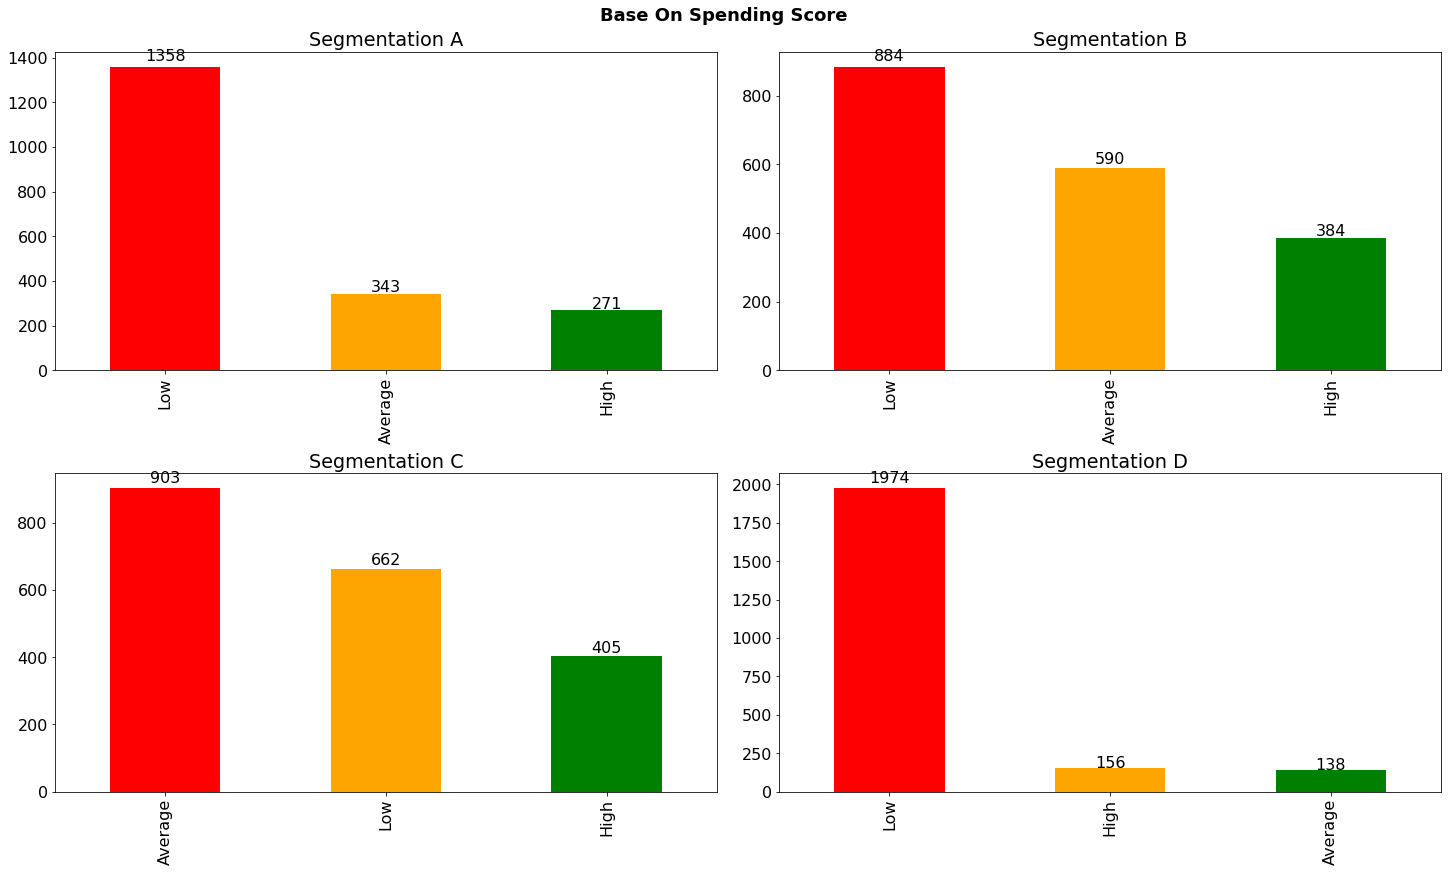

In [56]:
## Segmentation for Spending Score

plt.figure(figsize=(20,12),constrained_layout = True)

color_list = ["red","orange","green","blue","brown","cyan"]
plt.suptitle("Base On Spending Score", fontweight="bold", fontsize ='18')
plt.rcParams['font.size'] = '16'

plt.subplot(2,2,1)
ax = train.Spending_Score[train['Segmentation']=='A'].value_counts().plot(kind='bar',color=color_list)
ax.set_title("Segmentation A")

plt.subplot(2,2,2)
ay = train.Spending_Score[train['Segmentation']=='B'].value_counts().plot(kind='bar',color=color_list)
ay.set_title("Segmentation B")

plt.subplot(2,2,3)
az = train.Spending_Score[train['Segmentation']=='C'].value_counts().plot(kind='bar',color=color_list)
az.set_title("Segmentation C")

plt.subplot(2,2,4)
ap = train.Spending_Score[train['Segmentation']=='D'].value_counts().plot(kind='bar',color=color_list)
ap.set_title("Segmentation D")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
for p in ay.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ay.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
for p in az.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    az.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
for p in ap.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ap.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
plt.savefig('segmenspending.png')

In [64]:
##cheking value


s = train.Age[train['Segmentation'] == 'A'].value_counts()
print('rata-rata umur segment A',s.mean())

a = train.Age[train['Segmentation'] == 'B'].value_counts()
print('rata-rata umur segment B',a.mean())

t = train.Age[train['Segmentation'] == 'C'].value_counts()
print('rata-rata umur segment C',t.mean())

u = train.Age[train['Segmentation'] == 'D'].value_counts()
print('rata-rata umur segment D',u.mean())


rata-rata umur segment A 29.432835820895523
rata-rata umur segment B 27.73134328358209
rata-rata umur segment C 29.402985074626866
rata-rata umur segment D 33.850746268656714


In [77]:
##cheking value gender

s = train.Gender[train['Segmentation'] == 'A'].value_counts()



a = train.Profession[train['Segmentation'] == 'B'].value_counts()


t = train.Gender[train['Segmentation'] == 'C'].value_counts()


u = train.Gender[train['Segmentation'] == 'D'].value_counts()

print(s,'\n',a,'\n',t,'\n',u)

Male      1063
Female     909
Name: Gender, dtype: int64 
 Artist           756
Entertainment    221
Engineer         189
Executive        183
Lawyer           158
Doctor           143
Healthcare       101
Homemaker         55
Marketing         30
Name: Profession, dtype: int64 
 Male      1048
Female     922
Name: Gender, dtype: int64 
 Male      1309
Female     959
Name: Gender, dtype: int64


In [ ]:
a = [a for a in train['Segmentation'] if a == 'A']
b = [b for b in train['Segmentation'] if b == 'B']

# for x in train['Segmentation']:


In [ ]:
data_dict = {}
count = 1
for data in target:
    data_dict[data] = count
    count+=1
train['Segmentation'] = train['Segmentation'].replace(data_dict)


In [ ]:
cols = train.columns
print (cols)

train_new = train[cols]
corr = train_new.corr()
print(corr["Segmentation"])

In [ ]:
train["Segmentation"] .value_counts()

In [ ]:
#drop segmen from train
# train.drop(['Segmentation'], axis = 1, inplace = True)

# Combine train and test

In [ ]:
data0 = pd.concat((train,test), ignore_index=True)
data0.shape

In [ ]:
sns.heatmap(data0.isna(),yticklabels = False, cbar = False)

In [ ]:
missing_train = data0.isna().sum()
percentage_missing_train = data0.isna().mean().round(4)*100
data = {'Missing Values' : missing_train,
        'percentage missing values' : percentage_missing_train
       }
# data2 = data.sort_values(by='Missing Values')
data2 = pd.DataFrame(data)
data3 = data2.sort_values(by='Missing Values',ascending=False)
dfStyler = data3.style.set_properties(**{'text-align': 'center'})
dfStyler

In [ ]:
def missing_values(df, ascending):
    missing = df.isna().sum().sort_values(ascending = False)
    missing = missing[df.isna().sum().sort_values(ascending = False) != 0]
    
    percentage = (df.isna().sum().sort_values(ascending = False)/len(df)*100)[(df.isna().sum().sort_values(ascending = False)/len(df)*100) != 0]
    return pd.concat([missing, percentage], axis =1, keys=['missing','percentage'])

def miss_plot(df):
    fig,ax = plt.subplots(figsize =(12,9))
    sns.barplot(data = df, x=df.index, y = 'percentage', palette = 'winter')
    plt.axhline(y = len(df)/4, color = 'red', linewidth = 1.5)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
missing = missing_values(data0, False)
miss_plot(missing)

# Data Visualization

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Work_Experience','Family_Size','Age','Spending_Score']:
    n += 1
    plt.subplot(1 , 3, n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data0[x] , bins = 20)
    plt.axvline(x = data0[x].mean(), ls = '--', c = 'red', linewidth=1.5)
    plt.title('Distplot of {}'.format(x))
    
plt.show()

In [ ]:
data0['Gender'].value_counts().plot(kind='bar')

In [ ]:

plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Work_Experience','Family_Size','Age']:
    for y in ['Work_Experience','Family_Size','Age']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data0)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Work_Experience' , data = data0[data0['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Work_Experience') 
plt.title('Age vs Work_Experience w.r.t Gender')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px
fig = px.pie(data0, names = "Gender",
             title = "<b>Counts in Gender</b>",
             hole = 0.5,             
            color_discrete_sequence=px.colors.sequential.Sunset_r)

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

In [ ]:
data0.Profession.value_counts().sort_values(ascending=False).plot(kind='bar')

# Cleaning data

Handling Missing Values¶


Numerical features : modus


Categorical features : replace None


Var_1: delete

In [ ]:
type = data0.dtypes[['Work_Experience','Family_Size','Ever_Married','Profession','Var_1','Graduated']]
type

In [ ]:
data0['Work_Experience'].value_counts()

In [ ]:
data0['Family_Size'].value_counts()

In [ ]:
data0[data0['Work_Experience'].isna()]

In [ ]:
#drop var_1 column
data0.drop(['Var_1'],axis=1, inplace = True)
data0.shape

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf_numerics = data0.select_dtypes(include=numerics)

for x in newdf_numerics:
    data0[x].replace([np.nan],data0[x].mode()[0],inplace=True)

In [ ]:
newdf_numerics.isna().sum()

In [ ]:
object = ['object']
newdf_object = data0.select_dtypes(include=object)
newdf_object.isna().sum().sort_values(ascending=False)

# for x in newdf_object :
#     data0[x].replace([np.nan],'None',inplace=True)

In [ ]:
for x in newdf_object :
    data0[x].replace([np.nan],'None',inplace=True)

In [ ]:
data0.isna().sum()

In [ ]:
data0.Profession.value_counts()

In [ ]:
data0.Spending_Score.value_counts()

In [ ]:
cat_object = {
    'Spending_Score': {'Low' : 1,'Average':2,'High':3},
}

data0.replace(cat_object, inplace = True)

In [ ]:
data0.Spending_Score.value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder

mapping = LabelEncoder()
data0['Gender'] = mapping.fit_transform(data0['Gender'])
data0['Ever_Married'] = mapping.fit_transform(data0['Ever_Married'])
data0['Graduated'] = mapping.fit_transform(data0['Graduated'] )
data0['Profession'] = mapping.fit_transform(data0['Profession'])
data0[['Gender','Ever_Married','Graduated','Profession']].head()

In [ ]:
data0.head()


In [ ]:
data0.isna().sum()

In [ ]:
sns.heatmap(data0.isna(),yticklabels = False, cbar=False)

**As we can see labels are categorical. KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers**


* D correspond to 3
* A orrespond to 0
* C correspond to 2
* B correspond to 1

In [ ]:
# target_before = pd.DataFrame(target, columns=['target'])
# target_before.value_counts()

In [ ]:
# #Label Encoding
# from sklearn.preprocessing import LabelEncoder

# # creating initial dataframe
# target_df = pd.DataFrame(target, columns=['target'])

# # creating instance of labelencoder
# labelencoder = LabelEncoder()

# # Assigning numerical values and storing in another column
# target_df['target'] = labelencoder.fit_transform(target_df['target'])
# target_df.value_counts()

# Min Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data1 = pd.DataFrame(scaler.fit_transform(data0), columns = data0.columns)
data1.head()

In [ ]:
#knowing max and min scala

scala = scaler.fit_transform(data0)
min(scala[0]), max(scala[0]) 

**as we can see, now the have all value in rang 0-1**

In [ ]:
fig,ax = plt.subplots(figsize=(10,7))
sns.heatmap(data1.corr(), annot=True, ax=ax)
plt.show()

In [ ]:
data1.shape

# split train test data

In [ ]:
train_final = data1.loc[:train.index.max(), :].copy()
test_final = data1.loc[train.index.max() + 1:, :].reset_index(drop=True).copy()

In [ ]:
print('train final {} \n'.format(train_final.shape))
print('test final {}'.format(test_final.shape))

In [ ]:
train_final.head()

In [ ]:
test_final.head()

In [ ]:
# from sklearn.model_selection import train_test_split
# # X = data0.drop(columns=['ID','Segmentation'])
# # y = data0.Segmentation
# X_train,X_test,y_train,y_test = train_test_split(train_final,target,test_size=0.25,random_state=0)
# X_train.shape,X_test.shape,y_train.shape,y_test.shape

# USING KNN METHOD

In [ ]:
#Let's use knn algorithm on numeric columns

X_train = train_final
y_train = train['Segmentation']
X_test = test_final

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [ ]:
X_test.head()

In [ ]:
X_test.dtypes

In [ ]:
test_final.dtypes

In [ ]:
test_final.shape, X_test.shape

# CHANGE OBJECT TO NUMBER

In [ ]:
from collections import OrderedDict
data_dict_new = OrderedDict(sorted(data_dict.items()))
print(data_dict_new)

# MAKE CSV FILE

In [ ]:

#print(type(predictions) for result like get dummies)
result_dataframe = pd.DataFrame({
    "Id": test_id,

})
for key,value in data_dict_new.items():
    result_dataframe[key] = 0
count = 0
for item in predictions:
    for key,value in data_dict.items():
        if(value == item):
            result_dataframe[key][count] = 1
    count+=1
result_dataframe.to_csv("submission_knn.csv", index=False) 
result_dataframe.head()

In [ ]:
id_result = result_dataframe['Id'].tolist()
# result_dataframe.index = 1
# result_dataframe.index += 1

no = np.arange(1, len(id) + 1)
id = pd.DataFrame({
#     'No' : result_dataframe.index,
    'no' : no,
    'Id' : id_result
})

id

In [ ]:

result_dataframe2 = result_dataframe.drop(['Id'],axis=1)
s2 = result_dataframe2.idxmax(axis=1)
no = np.arange(1, len(s2)+1)
segmen = pd.DataFrame({
   'no' : no,
    'Segmentasi' : s2
})
# segmen.index = np.arange(0,len(s2)+1)
segmen


In [ ]:
result_final = pd.merge(id,segmen,on='no')

# GET FINAL RESULT IN CSV

In [ ]:
result_final.drop(['no'],axis=1,inplace=True)

In [ ]:
result_final.to_csv("submission_kkn_final.csv",index=False)
result_final.tail(10)